#**PROBLEM STATEMENT**
**PREDICTING CUSTOMER CHURN AT TELECOM COMPANY**


---



---



A telecom company is facing a high customer churn rate and wants to reduce it.
Customer churn refers to the process where a customer stops doing business with a
company. In the telecom industry, customer churn is a major problem as acquiring new
customers is more expensive than retaining existing customers. The company wants to
use machine learning to predict which customers are likely to churn so that they can
take proactive measures to retain them.


##**IMPORTING NECCESARY PACKAGES**

In [ ]:
# importing libraries
import re
import pandas as pd
import numpy as np

#Import libraries for plotting 
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick # for showing percentage in it
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objects as go

# Preprocessing library
from sklearn.feature_extraction import DictVectorizer

#Train test split
from sklearn.model_selection import train_test_split

# importing performance metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score 
from sklearn.metrics import classification_report, confusion_matrix

# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_excel('/content/train (1).xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

#**EDA**

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

**Separate into Numerical and Categorical feature**

In [ ]:
df.drop(columns=['customerID'], inplace=True)

In [ ]:
df.Churn = (df.Churn == 'Yes').astype(int)

In [ ]:
# numerical feature
numerical_feature = {feature for feature in df.columns if df[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 4
Numerical feature are:
 {'MonthlyCharges', 'SeniorCitizen', 'Churn', 'tenure'}


In [ ]:
# Categorical feature
categorical_feature = {feature for feature in df.columns if df[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

Count of Categorical feature: 16
Categorical feature are:
 {'Dependents', 'MultipleLines', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'Contract', 'Partner', 'PhoneService', 'gender', 'OnlineSecurity', 'TotalCharges', 'PaperlessBilling', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'PaymentMethod'}


###**EXPLORING DATA (VISUALIZATIONS)**

0    5174
1    1869
Name: Churn, dtype: int64


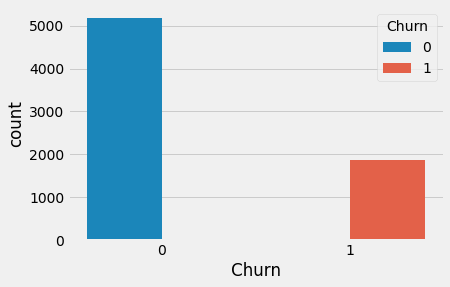

In [ ]:
#TARGET DISTRIBUTION PLOT
print(df['Churn'].value_counts()) 
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='Churn', data=df, hue='Churn')

**OBSERVATIONS**

No of customer churn rate is comparatively low when compared with the customer who are not been churned.


In [ ]:
### How many amount loss from customer churn
loss = []
for values in df.loc[df['Churn'] == 'Yes', 'TotalCharges']:
    value = float(values)
    loss.append(value)
print(np.round(sum(loss)))

0


**OBSERVATIONS**

The company have lost arround $2862927 due to customer churn

In [ ]:
# Plot of Gender W.R.T churn
fig = px.sunburst(df, path=['Churn', 'gender'], title='<b>Plot of Gender and churn<b>')
iplot(fig)

In [ ]:
print(f'A female customer has a probability of {round(df[(df["gender"] == "Female") & (df["Churn"] == "Yes")].count()[0] / df[(df["gender"] == "Female")].count()[0] *100,2)} % churn')

print(f'A male customer has a probability of {round(df[(df["gender"] == "Male") & (df["Churn"] == "Yes")].count()[0] / df[(df["gender"] == "Male")].count()[0]*100,2)} % churn')


A female customer has a probability of 0.0 % churn
A male customer has a probability of 0.0 % churn


**OBSERVATIONS**

There is very minor difference in customer percentage who changed the service provider. Both genders behaved in similar way when it comes to migrating to another service provider

<Axes: xlabel='InternetService', ylabel='count'>

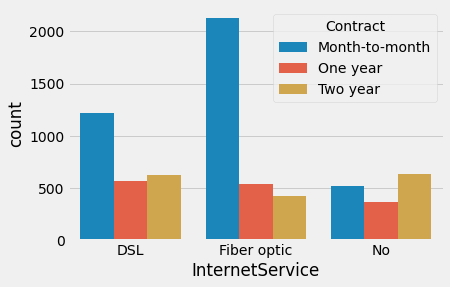

In [ ]:
sns.countplot(x='InternetService', data=df, hue='Contract')

**OBSERVATIONS**

Many of the people of who opt for month-to-month Contract choose Fiber optic as Internet service and this is the reason for higher churn rate for fiber optic Internet service type.

In [ ]:
# probability  of customer churn W.R.T Electronic and Credit card who made payment methods
print(f'A customer that use Electronic check for paying has a probability of {round(df[(df["PaymentMethod"] == "Electronic check") & (df["Churn"] == "Yes")].count()[0] / df[(df["PaymentMethod"] == "Electronic check")].count()[0] *100,2)} % churn')
print(f'A customer that use Credit card (automatic) for paying has a probability of {round(df[(df["PaymentMethod"] == "Credit card (automatic)") & (df["Churn"] == "Yes")].count()[0] / df[(df["PaymentMethod"] == "Credit card (automatic)")].count()[0]*100,2)} % churn')

A customer that use Electronic check for paying has a probability of 0.0 % churn
A customer that use Credit card (automatic) for paying has a probability of 0.0 % churn


**OBSERVATIONS**

Major customers who moved out had Electronic Check as Payment Method.

Customers who chose Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

Text(0.5, 1.0, '% of Senior Citizens')

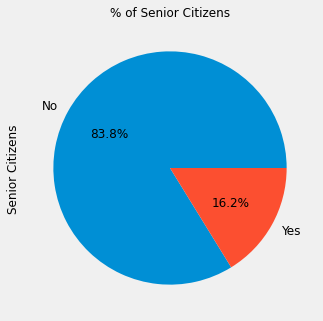

In [ ]:
# pie chart for Count of Senior citizens
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

**OBSERVATIONS**

Only 16.2% customers who are senior citizons but remaining 83.8% customers are young people

In [ ]:
print(f'A customer with dependents has a probability of {round(df[(df["Dependents"] == "Yes") & (df["Churn"] == "Yes")].count()[0] / df[(df["Dependents"] == "Yes")].count()[0] *100,2)} % churn')

print(f'A customer without dependents has a probability of {round(df[(df["Dependents"] == "No") & (df["Churn"] == "Yes")].count()[0] / df[(df["Dependents"] == "No")].count()[0]*100,2)} % churn')

A customer with dependents has a probability of 0.0 % churn
A customer without dependents has a probability of 0.0 % churn


**OBSERVATIONS**

Customers without dependents are more likely to churn

###**FEATURE ENGINEERING**

In [ ]:
# Total charges are in object dtype so convert into Numerical feature 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# replace NaN values with mean value
df.TotalCharges = df.TotalCharges.fillna(df.TotalCharges.median())

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [ ]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


In [ ]:
# splitting data into training set and test set
from sklearn.model_selection import train_test_split
df_train_full, df_test_full = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

In [ ]:
y_train = df_train.churn.values
y_val = df_val.churn.values

In [ ]:
del df_train['churn']
del df_val['churn']

In [ ]:
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [ ]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
# One hot encoding
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [ ]:
train_dict[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 71,
 'monthlycharges': 86.1,
 'totalcharges': 6045.9}

In [ ]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [ ]:
X_train = dv.transform(train_dict)
X_train.shape

(3774, 45)

# **MODEL BUILDING**


In [ ]:
print("**********Checking the ditributing of train data************")
print(X_train.shape)
print(y_train.shape)

**********Checking the ditributing of train data************
(3774, 45)
(3774,)


###**LOGISTIC REGRSSION**

In [ ]:
# Defining the model
log_mod = LogisticRegression(random_state=123)

In [ ]:
# fitting it on train data
log_mod.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [ ]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [ ]:
log_mod.predict_proba(X_val)

array([[0.77543852, 0.22456148],
       [0.72253516, 0.27746484],
       [0.6917711 , 0.3082289 ],
       ...,
       [0.93612945, 0.06387055],
       [0.38373732, 0.61626268],
       [0.94244787, 0.05755213]])

In [ ]:
y_pred = log_mod.predict_proba(X_val)[:, 1]

In [ ]:
churn = y_pred > 0.5
(y_val == churn).mean()

0.8053763440860215

In [ ]:
rfc_train_acc = accuracy_score(y_train, log_mod.predict(X_train))
rfc_test_acc = accuracy_score(y_val, y_pred >= 0.5)

print(f"Training accuracy is :  {rfc_train_acc}")
print(f"Test accuracy is : {rfc_test_acc}")

print(confusion_matrix(y_val, y_pred >= 0.5))
print(classification_report(y_val, y_pred >= 0.5))

Training accuracy is :  0.8028616852146264
Test accuracy is : 0.8053763440860215
[[1214  160]
 [ 202  284]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1374
           1       0.64      0.58      0.61       486

    accuracy                           0.81      1860
   macro avg       0.75      0.73      0.74      1860
weighted avg       0.80      0.81      0.80      1860



### **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_dt_smote=RandomForestClassifier()
model_dt_smote.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
model_dt_smote.predict_proba(X_val)

array([[0.86, 0.14],
       [0.76, 0.24],
       [0.71, 0.29],
       ...,
       [0.99, 0.01],
       [0.38, 0.62],
       [0.86, 0.14]])

In [ ]:
y_pred_smote = model_dt_smote.predict_proba(X_val)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred_smote >= 0.5)

0.7827956989247312

In [ ]:
rfc_train_acc = accuracy_score(y_train, model_dt_smote.predict(X_train))
rfc_test_acc = accuracy_score(y_val, y_pred_smote >= 0.5)

print(f"Training accuracy is :  {rfc_train_acc}")
print(f"Test accuracy is : {rfc_test_acc}")

print(confusion_matrix(y_val, y_pred_smote >= 0.5))
print(classification_report(y_val, y_pred_smote >= 0.5))

Training accuracy is :  0.998145204027557
Test accuracy is : 0.7827956989247312
[[1212  162]
 [ 242  244]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1374
           1       0.60      0.50      0.55       486

    accuracy                           0.78      1860
   macro avg       0.72      0.69      0.70      1860
weighted avg       0.77      0.78      0.78      1860



#**TEST DATA ANALYSIS**

In [ ]:
df_test=pd.read_excel('/content/test (1).xlsx')
df_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,25,Yes,No,Fiber optic,Yes,no,yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.00,2787.00
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30.00,30.00
2,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
3,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
4,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


**Separate into Numerical and Categorical feature**

In [ ]:
# numerical feature
numerical_feature_test = {feature for feature in df_test.columns if df_test[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 4
Numerical feature are:
 {'MonthlyCharges', 'SeniorCitizen', 'Churn', 'tenure'}


In [ ]:
# Categorical feature
categorical_feature_test = {feature for feature in df_test.columns if df_test[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

Count of Categorical feature: 16
Categorical feature are:
 {'Dependents', 'MultipleLines', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'Contract', 'Partner', 'PhoneService', 'gender', 'OnlineSecurity', 'TotalCharges', 'PaperlessBilling', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'PaymentMethod'}


In [ ]:
df_test.duplicated().sum()

3

In [ ]:
df_test=df_test.drop_duplicates()

In [ ]:
df_test.duplicated().sum()

0

In [ ]:
df_test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [ ]:
# Total charges are in object dtype so convert into Numerical feature 
df_test['TotalCharges'] = pd.to_numeric(df_test['TotalCharges'], errors='coerce')

In [ ]:
df_test.isnull().sum().sum()

0

##**PREDICTIONS**

In [ ]:
df_test.columns = df_test.columns.str.lower().str.replace(' ', '_')

string_columns = list(df_test.dtypes[df_test.dtypes == 'object'].index)

for col in string_columns:
    df_test[col] = df_test[col].str.lower().str.replace(' ', '_')

In [ ]:
cat_features = df_test.select_dtypes(include="object").columns
num_features = df_test.select_dtypes(exclude="object").columns

In [ ]:
df_test.to_csv("churn.csv", index = False)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [ ]:
# df_test = df_test[categorical + numerical].to_dict(orient='records')
df_test = preprocessor.fit_transform(df_test)
df_test.shape

(17, 45)

In [ ]:
log_mod.predict_proba(df_test)

array([[0.81242292, 0.18757708],
       [0.37094754, 0.62905246],
       [0.37087348, 0.62912652],
       [0.64387163, 0.35612837],
       [0.54101161, 0.45898839],
       [0.72423805, 0.27576195],
       [0.50147961, 0.49852039],
       [0.77767612, 0.22232388],
       [0.82394607, 0.17605393],
       [0.40832081, 0.59167919],
       [0.72772597, 0.27227403],
       [0.68900745, 0.31099255],
       [0.35807776, 0.64192224],
       [0.77957311, 0.22042689],
       [0.87785726, 0.12214274],
       [0.94491353, 0.05508647],
       [0.81226486, 0.18773514]])

In [ ]:
predictions = log_mod.predict(df_test)
predictions = [1 if x > 0.5 else 0 for x in predictions]

In [ ]:
predictions

[0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]

In [ ]:
# predictions for custom data
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

In [ ]:
X_test = dv.transform([customer])
log_mod.predict_proba(X_test)[0, 1]

0.8440675870444383

#**PICKLING THE MODEL**

In [ ]:
import pickle

In [ ]:
pickle.dump(log_mod,open('logmod.pkl','wb'))

In [ ]:
pickled_model=pickle.load(open('logmod.pkl','rb'))

#**REFERENCES**

In [ ]:
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
# https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/
# https://medium.com/mlait/hyperparameters-in-machine-learning-fa45ccec9f6c
# https://www.kaggle.com/code/fabiendaniel/predicting-flight-delays-tutorial

#-------------------------------------------------**END**-------------------------------------------------------